In [1]:
import numpy as np
np.random.seed(4)
def createData(n, k):
    ptspercluster = float(n)/k
    X = []
    y = []
    for i in range (k):
        pt1 = np.random.uniform(20000.0, 200000.0)
        pt2 = np.random.uniform(20.0, 70.0)
        for j in range(int(ptspercluster)):
            X.append([np.random.normal(pt1, 10000.0), np.random.normal(pt2, 2.0)])
            y.append(i)
    x = np.array(X)
    y = np.array(y)
    return x, y

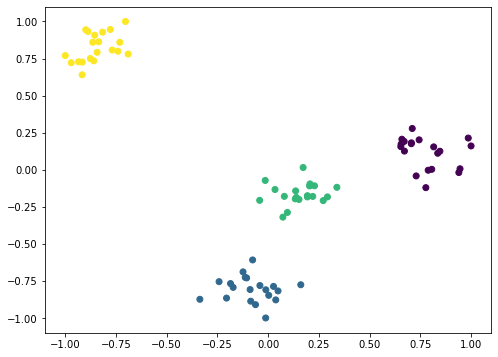

In [2]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
(x, y) = createData(80, 4)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(x)
x = scaling.transform(x)

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [3]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1.0).fit(x, y)

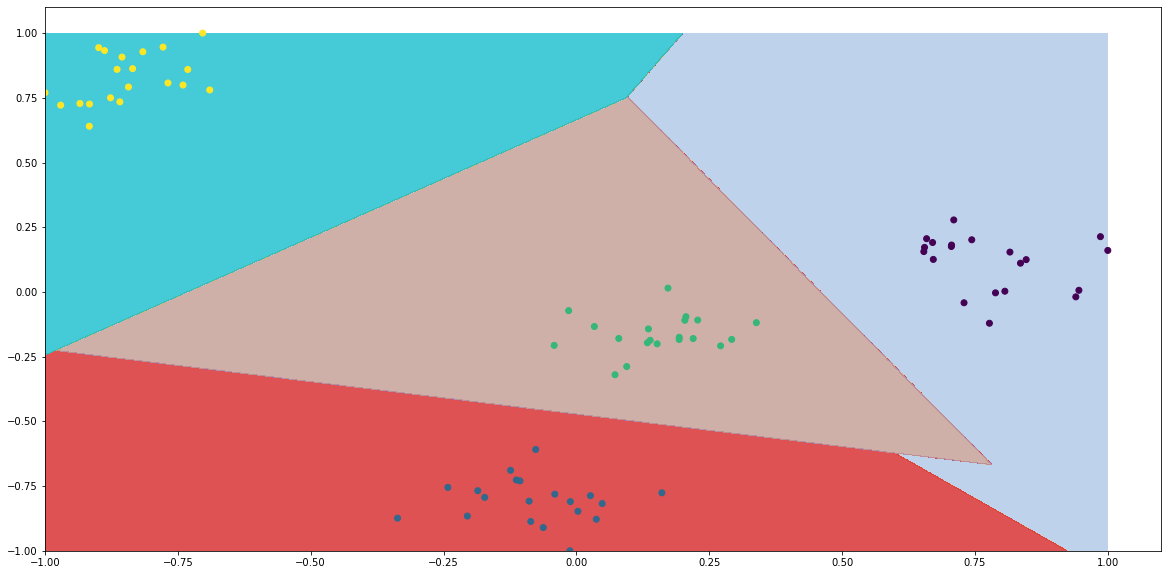

In [5]:
def plotPredictions(classif):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    x1 = xx.flatten()
    x2 = yy.flatten()
    
    # Convert to a list of 2D (x1, x2) points
    pred = np.c_[x1, x2]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = classif.predict(pred)

    plt.figure(figsize=(20, 10))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.tab20, alpha=0.8) # Draw the contour
    plt.scatter(x[:,0], x[:,1], c=y) # Draw the points
    plt.show()
    
plotPredictions(svc)